# This notebook analyzes FVS benchmark training time results and produces various graphics

In [2]:
#
# Imports
# 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

In [3]:
#
# Plot training time
# 

def plot_training_time(ax, data, query):
    
    fp = 'results/benchmarks-deep{}M-q{}.csv'.format(data, query)
    
    # read in benchmark
    df = pd.read_csv(fp)
    df['train_delta'] = df['ts_train_end'] - df['ts_train_start']
    
    # only need these two columns for plotting
    new_df = df[['bits', 'train_delta']]

    # mean training delta
    mu = new_df.groupby('bits')['train_delta'].mean().to_frame().reset_index()
    
    # title of plot
    title = 'Index Build/Train Time for {}M of Deep 1B'.format(data)
    xlabel = 'size of trained vector in bits'
    ylabel = 'Index build/train time (seconds)'
    plot_file = 'results/deep1B_{}_train_time.png'.format(data)
    
    # plot
    xs = list(new_df['bits'])
    ys = list(new_df['train_delta'])
    ax.scatter(xs, ys, marker='x')
    sns.lineplot(ax=ax, x='bits', y='train_delta', data=mu, color='.3')
    
    
    

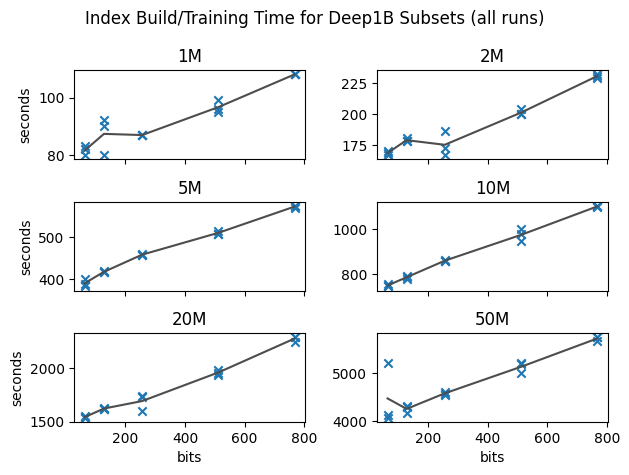

In [4]:
data = [1, 2, 5, 10, 20, 50]

fig, ax = plt.subplots(3, 2, sharex=True)

plot_training_time(ax[0,0], data[0], 10) 
plot_training_time(ax[0,1], data[1], 10) 
plot_training_time(ax[1,0], data[2], 10) 
plot_training_time(ax[1,1], data[3], 10) 
plot_training_time(ax[2,0], data[4], 10) 
plot_training_time(ax[2,1], data[5], 10) 

ax[0,0].set_title("%dM" % data[0])
ax[0,0].set_ylabel("seconds")
ax[0,1].set_title("%dM" % data[1])
ax[0,1].set_ylabel("")
ax[1,0].set_title("%dM" % data[2])
ax[1,0].set_ylabel("seconds")
ax[1,1].set_title("%dM" % data[3])
ax[1,1].set_ylabel("")
ax[2,0].set_title("%dM" % data[4])
ax[2,0].set_ylabel("seconds")
ax[2,1].set_title("%dM" % data[5])
ax[2,1].set_ylabel("")

title = 'Index Build/Training Time for Deep1B Subsets (all runs)'
plt.suptitle(title)

plt.tight_layout()
plt.savefig("results/Deep1B_subplots_train_time.png")

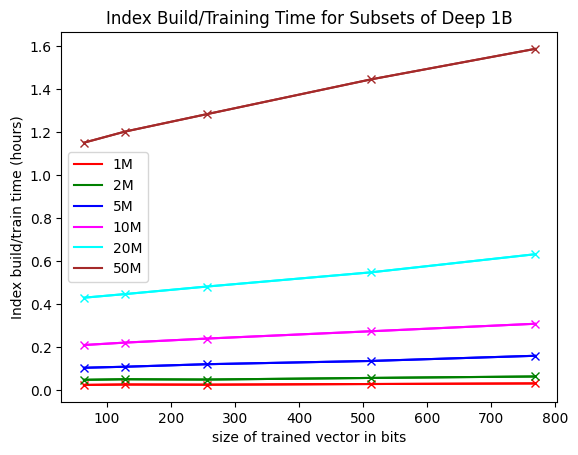

In [8]:
# get all the csv files
csv_files = glob.glob( os.path.join("results","*.csv" ) )

# load into a master dataframe
dfs = []
for csv_file in csv_files:
    dfs.append( pd.read_csv( csv_file ) )
master_df = pd.concat( dfs )

# add a database size column extracted from the dataset_path
master_df['dsize'] = master_df.apply( \
    lambda row: row["dataset_path"].split("/")[-1].split(".")[0].split("-")[1], axis=1 )
# compute the train elapsed time
master_df['train_delta'] = master_df['ts_train_end'] - master_df['ts_train_start']

# only need these three columns for plotting
new_df = master_df[['dsize', 'bits', 'train_delta']]

# mean training delta
mu = new_df.groupby(['bits','dsize'])['train_delta'].median().to_frame().reset_index()

# get unique dsize's
dsizes = list(mu['dsize'].unique())
dsizes = sorted( dsizes, key = lambda sz: int(sz.split("M")[0]) )
    
colors = ['red','green','blue','magenta','cyan', 'brown']
# create master plot where each line is a dsize
plt.title(title)
for idx, dsize in enumerate(dsizes):
    dsz = mu[mu["dsize"]==dsize][["bits","train_delta"]]
    bits = list(dsz["bits"])
    train_delta = [seconds/(60*60) for seconds in list(dsz["train_delta"])]
    #print(bits, train_delta)
    plt.plot(bits, train_delta, label=dsize, color=colors[idx])
    plt.plot(bits, train_delta, marker='x', color=colors[idx])
    #sns.lineplot(x='bits', y='train_delta', data=mu, color='.3')
    
title = 'Index Build/Training Time for Subsets of Deep 1B'
xlabel = 'size of trained vector in bits'
ylabel = 'Index build/train time (hours)'
plot_file = 'results/deep1B_master_train_time2.png'

plt.xlabel(xlabel)
plt.ylabel(ylabel)   
plt.legend(loc=0)
plt.title(title)
plt.savefig( plot_file )